# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
49169,id_5966,Madrid,NaN,5969.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187514-d8285422-Reviews-Va...,d8285422,1,4.0
49249,id_514,Rome,"['Pizza', 'Italian', 'Seafood', 'Mediterranean...",515.0,$$ - $$$,757.0,"[['Seafood delight', 'Lovely restaurant off th...",/Restaurant_Review-g187791-d7099015-Reviews-La...,d7099015,1,4.0
37834,id_5616,Berlin,['Thai'],5618.0,NaN,9.0,"[['Fast Friendly Local-favorite Lunch', 'Good ...",/Restaurant_Review-g187323-d2554534-Reviews-Th...,d2554534,1,4.0
35390,id_944,Krakow,NaN,945.0,NaN,3.0,"[[], []]",/Restaurant_Review-g274772-d12119431-Reviews-P...,d12119431,1,4.5
10221,id_2617,Lisbon,NaN,2620.0,NaN,2.0,"[[], []]",/Restaurant_Review-g189158-d12999507-Reviews-C...,d12999507,1,4.0


In [14]:

print(data['Reviews'][2][-13:-3])

12/06/2017


In [15]:
# преобразуем столбец обзоров в релевантные данные
# взял мелкую выборку для тренировки 

def data_make(data, ser):
    ser2 = list()
    for i in range(len(data[ser])):
        if str(data[ser][i]).find('/') != -1:
            ser2.append(data[ser][i][-13:-3])
        else:
            ser2.append('NaN')
    ser2 = pd.to_datetime(ser2, infer_datetime_format=True) 
    return ser2
        
def DoW(ser):
    ser2 = list()
    for i in range(len(ser)):
        if ser[i] != 'NaT':
            ser2.append(ser[i].dayofweek)
        else:
            ser2.append(ser[i])
    return ser2
    #ser.fillna(ser.dropna().value_couns.max())

def year(ser):
    ser2=list()
    for i in range(len(ser)):
        if ser[i] != 'NaT':
            ser2.append(ser[i].year)
        else:
            ser2.append(ser[i])
    return ser2
    
df = data[0:20]
data2 = data_make(df , 'Reviews' )
data3 = DoW(data2)
dataY = year(data2)
df['year']= dataY
df['wd']=data3
df['WDNAN'] = pd.isna(df['wd']).astype('uint8')
df.wd = df.wd.fillna(df.wd.value_counts().max())
df['YNAN'] = pd.isna(df['year']).astype('uint8')
df.year = df.year.fillna(df.year.value_counts().index[0])

df

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,year,wd,WDNAN,YNAN
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,2017.0,5.0,1,1
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,2017.0,6.0,0,0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,2017.0,2.0,0,0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,2017.0,2.0,0,0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,2018.0,2.0,0,0
5,id_5,Paris,"['French', 'Cafe', 'Fast Food']",5093.0,$,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,2017.0,5.0,0,0
6,id_6,Lisbon,"['European', 'Portuguese']",3704.0,$,2.0,"[[], []]",/Restaurant_Review-g189158-d8758873-Reviews-Li...,d8758873,0,0.0,2017.0,5.0,1,1
7,id_7,Budapest,NaN,2330.0,NaN,NaN,"[[], []]",/Restaurant_Review-g274887-d8286886-Reviews-Be...,d8286886,0,0.0,2017.0,5.0,1,1
8,id_8,Helsinki,"['European', 'Scandinavian']",771.0,NaN,2.0,"[['Big group supper', 'Good food but very slow...",/Restaurant_Review-g189934-d12947542-Reviews-B...,d12947542,0,0.0,2017.0,2.0,0,0
9,id_9,Stockholm,['Italian'],605.0,NaN,13.0,"[['Good food', 'Good pizza'], ['12/02/2017', '...",/Restaurant_Review-g189852-d12716384-Reviews-I...,d12716384,0,0.0,2017.0,6.0,0,0


In [16]:
# применяем на датасет
data2 = data_make(data, 'Reviews')
data3 = DoW(data2)
data['wd']=data3
data['WDNAN'] = pd.isna(data['wd']).astype('uint8')
data.wd = data.wd.fillna(data.wd.value_counts().index[0])
data.sample(5)
dataY = year(data2)
data['year']= dataY
data['YNAN'] = pd.isna(data['year']).astype('uint8')
data.year = data.year.fillna(data.year.value_counts().index[0])

In [17]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,wd,WDNAN,year,YNAN
9382,id_9382,London,"['Italian', 'Cafe', 'Mediterranean', 'European...",2080.0,$$ - $$$,78.0,"[['Great wine, Good food, good Italian atmosp....",/Restaurant_Review-g186338-d9709112-Reviews-Ca...,d9709112,0,0.0,6.0,0,2017.0,0
9276,id_9276,Paris,NaN,8638.0,NaN,4.0,"[[], []]",/Restaurant_Review-g187147-d12234886-Reviews-B...,d12234886,0,0.0,6.0,1,2017.0,1
11028,id_16353,London,"['Fast Food', 'Halal']",16370.0,NaN,NaN,"[['THE WINGS DISASTER'], ['05/18/2017']]",/Restaurant_Review-g186338-d7274076-Reviews-Or...,d7274076,1,1.0,3.0,0,2017.0,0
34289,id_4792,Paris,NaN,4793.0,NaN,34.0,"[['Take away noodles: great!'], ['10/10/2015']]",/Restaurant_Review-g187147-d8547155-Reviews-Ma...,d8547155,1,4.0,5.0,0,2015.0,0
1149,id_1149,Bratislava,"['Pub', 'Gastropub']",423.0,$$ - $$$,9.0,[['NEVER MISS! Try it !Great Beer and green s....,/Restaurant_Review-g274924-d6715733-Reviews-Ho...,d6715733,0,0.0,4.0,0,2016.0,0


Как видим, большинство признаков у нас требует очистки и предварительной обработки.

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [18]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [19]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [20]:
# Далее заполняем пропуски 0
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [21]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
wd                             7
WDNAN                          2
year                          13
YNAN                           2
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

In [22]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,wd,WDNAN,year,YNAN,Number_of_Reviews_isNAN
43800,id_1740,Amsterdam,"['Asian', 'Thai']",1745.0,$$ - $$$,30.0,"[[""Can't go wrong with this Thai"", 'Yummy Thai...",/Restaurant_Review-g188590-d10021431-Reviews-Y...,d10021431,1,3.5,6.0,0,2017.0,0,0
9131,id_9131,Paris,NaN,8519.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187147-d10760318-Reviews-A...,d10760318,0,0.0,6.0,1,2017.0,1,0
16568,id_1548,Hamburg,NaN,1550.0,NaN,12.0,"[['Great location, good food', 'Ok, for our 1s...",/Restaurant_Review-g187331-d5822234-Reviews-Ab...,d5822234,1,3.5,4.0,0,2017.0,0,0
21999,id_345,Brussels,"['European', 'International', 'Fusion', 'Veget...",346.0,$$ - $$$,135.0,"[['Surprising', 'Outstanding food, so-so servi...",/Restaurant_Review-g188644-d1075887-Reviews-Ta...,d1075887,1,4.0,1.0,0,2017.0,0,0
42709,id_12,Athens,"['Mediterranean', 'Greek', 'Vegetarian Friendl...",13.0,$$ - $$$,3392.0,"[['Good value delicious food', 'Excellent New ...",/Restaurant_Review-g189400-d1151377-Reviews-Li...,d1151377,1,4.5,3.0,0,2018.0,0,0


In [23]:
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [24]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
44670,id_3776,NaN,3785.0,NaN,2.0,"[[], []]",/Restaurant_Review-g274707-d9730144-Reviews-Bo...,d9730144,1,3.0,...,0,0,0,1,0,0,0,0,0,0
49326,id_369,"['Irish', 'Bar', 'Pub', 'Gastropub', 'Vegetari...",370.0,$$ - $$$,123.0,"[['Classy Gastro Pub', 'Great Beer, Fare & Vib...",/Restaurant_Review-g186605-d6833577-Reviews-57...,d6833577,1,4.5,...,0,0,0,0,0,0,0,0,0,0
18547,id_15081,['Fast Food'],15092.0,$,41.0,"[['Not great', 'Cheaters'], ['06/14/2017', '11...",/Restaurant_Review-g186338-d7291424-Reviews-Bu...,d7291424,1,3.0,...,0,0,0,0,0,0,0,0,0,0
22061,id_957,"['French', 'Dutch', 'Bar', 'European', 'Vegeta...",960.0,$$ - $$$,72.0,"[['Delicious food!!!!', 'Really nice place for...",/Restaurant_Review-g188590-d8357740-Reviews-Sm...,d8357740,1,4.0,...,0,0,0,0,0,0,0,0,0,0
35347,id_12676,"['Bar', 'Grill', 'Pub']",12686.0,NaN,0.0,"[['Loved the Secret Garden'], ['08/06/2014']]",/Restaurant_Review-g186338-d1044115-Reviews-Fi...,d1044115,1,4.0,...,0,0,0,0,0,0,0,0,0,0


#### Возьмем следующий признак "Price Range".

In [25]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [26]:
# Ваша обработка 'Price Range'
for i in range(len(data['Price Range'])):
    if data['Price Range'][i] == '$':
        data['Price Range'][i]= 1
    elif data['Price Range'][i]== '$$ - $$$':
        data['Price Range'][i]=2
    elif data['Price Range'][i]== '$$$$':
        data['Price Range'][i]=3

        
#data['Price Range'] = data['Price Range'].fillna(data['Price Range'].mean())
data['Price Range'] = data['Price Range'].fillna(data['Price Range'].mean())
for i in range(len(data['Price Range'])):
    if data['Price Range'][i] == 'Nan':
        mn = data[data['City'] == data['City'][i]]['Price Range'].mean()
        data['Price Range'][i] = mn

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [27]:
data['Price Range'].value_counts()

2.000000    23041
1.815129    17361
1.000000     7816
3.000000     1782
Name: Price Range, dtype: int64

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

In [28]:
# кухня
for i in range(len(data['Cuisine Style'])):
    data['Cuisine Style'][i] = str(data['Cuisine Style'][i]).replace("[", "")
    data['Cuisine Style'][i] = str(data['Cuisine Style'][i]).replace("]", "")
    data['Cuisine Style'][i] = str(data['Cuisine Style'][i]).replace(" ", "")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [29]:
data.head(2)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"'Bar','Pub'",12963.0,2.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"'European','Scandinavian','GlutenFreeOptions',...",106.0,2.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Посмотрим распределение признака

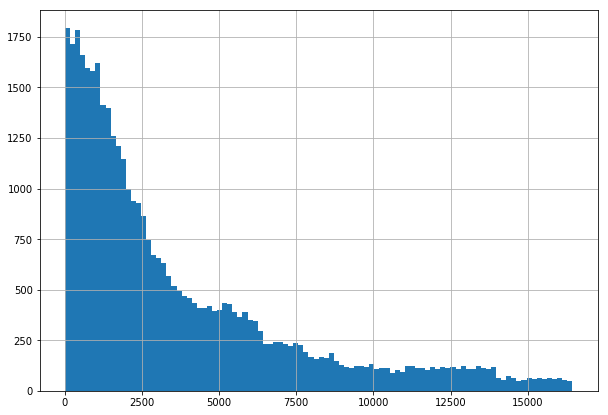

In [30]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

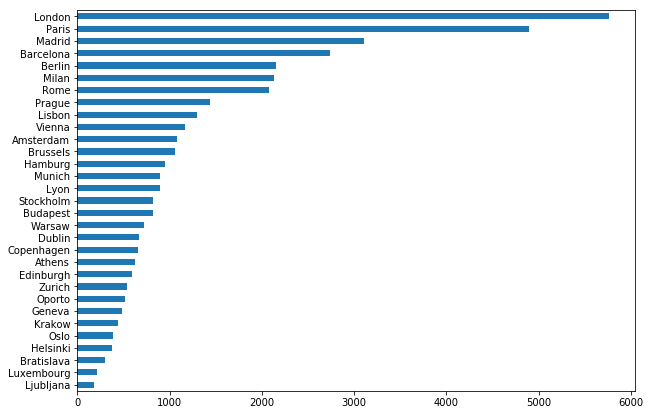

In [31]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

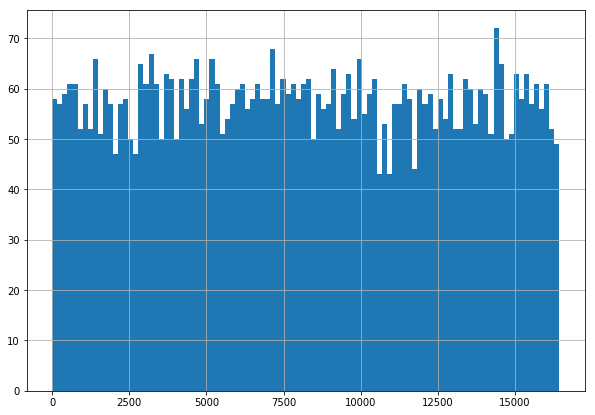

In [32]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

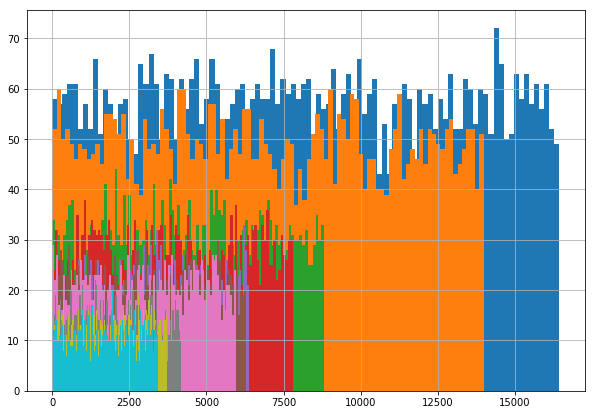

In [33]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.


### Посмотрим распределение целевой переменной

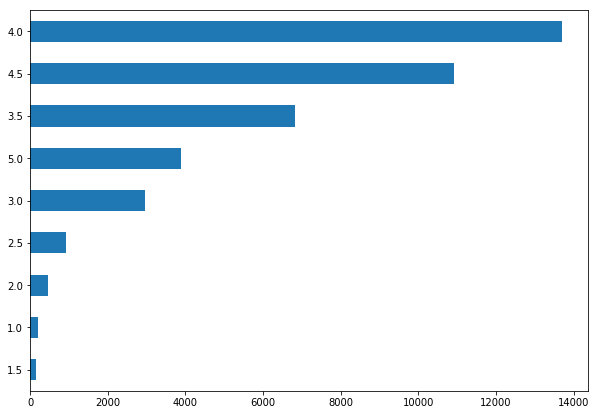

In [34]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

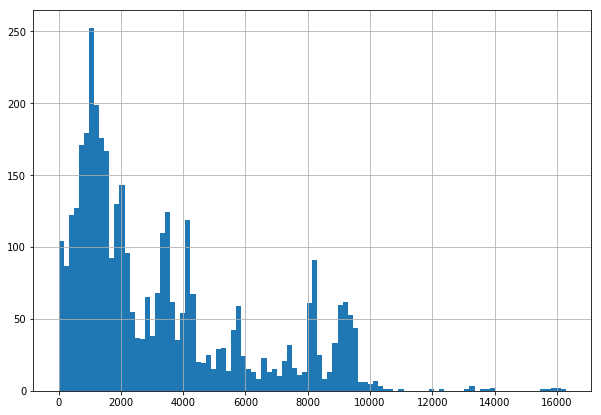

In [35]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

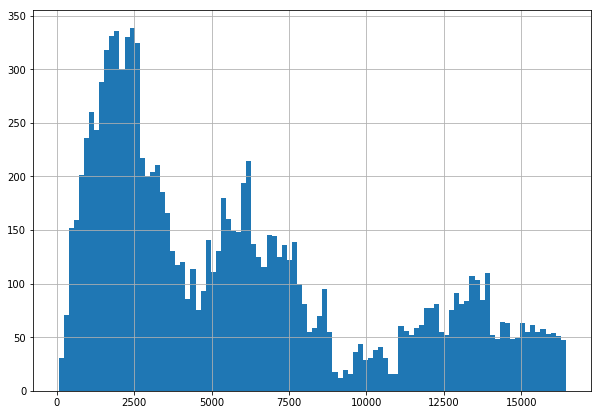

In [36]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

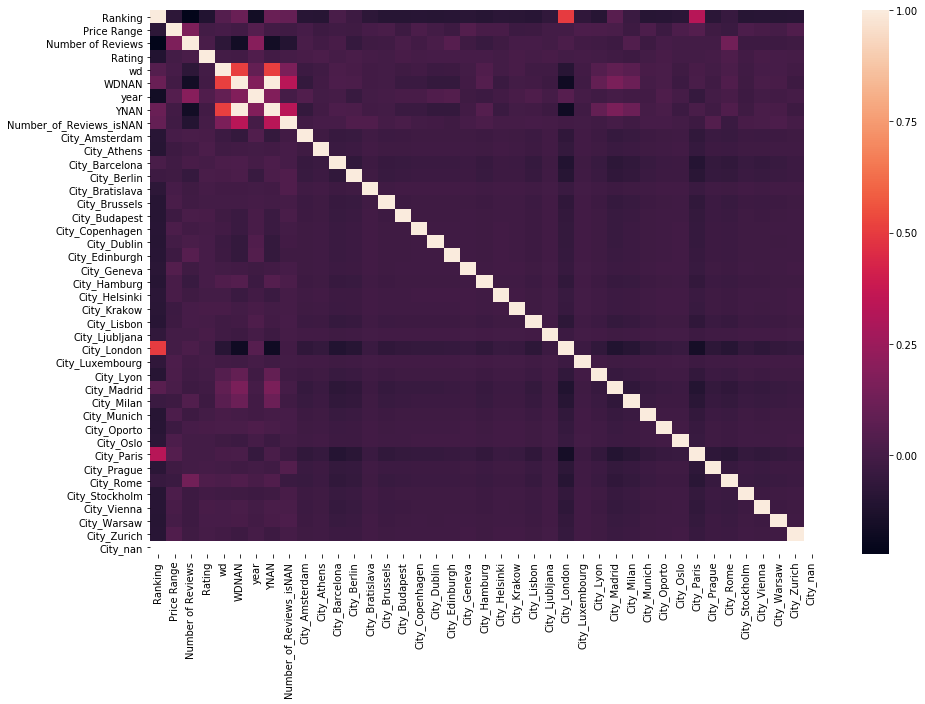

In [37]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [38]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [39]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # 1. Предобработка
    # убираем ненужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # 2. NAN
    # Далее заполняем пропуски
    df_output['Number of Reviews'].fillna(0, inplace=True)
    #'Price Range'
    for i in range(len(df_output['Price Range'])):
        if df_output['Price Range'][i] == '$':
            df_output['Price Range'][i]= 1
        elif df_output['Price Range'][i]== '$$ - $$$':
            df_output['Price Range'][i]=2
        elif df_output['Price Range'][i]== '$$$$':
            df_output['Price Range'][i]=3
    df_output['Price Range'] = df_output['Price Range'].fillna(df_output['Price Range'].mean())
    for i in range(len(df_output['Price Range'])):
        if df_output['Price Range'][i] == 'NaN':
            mn = df_output[data['City'] == df_output['City'][i]]['Price Range'].mean()
            df_output['Price Range'][i] = mn
            
    # делаем ранги внутри городов, а не только всеобщие
    
    df_output['rank_for_city'] = 0
    df_output['rank_for_city']=df_output['rank_for_city'].astype(np.float64)
    for i in range(len(df_output['City'])):
        col = len(df_output[df_output.City == df_output.City[i]])
        df_output['rank_for_city'][i] = float(df_output['Ranking'][i]) / float(col)
        
    # код не Encoding фитчей. я переместил этот блок выше
    data2 = data_make(df_output, 'Reviews')
    data3 = DoW(data2)
    df_output['wd']=data3
    df_output['WDNAN'] = pd.isna(df_output['wd']).astype('uint8')
    df_output.wd = df_output.wd.fillna(df_output.wd.value_counts().index[0])
    dataY = year(data2)
    df_output['year']= dataY
    df_output['YNAN'] = pd.isna(df_output['year']).astype('uint8')
    df_output.year = df_output.year.fillna(df_output.year.value_counts().index[0])
    
    # 3. Encoding 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)

    
    
    # 4. Feature Engineering
    # тут ваш код не генерацию новых фитчей
    # ....
    
    
    # 5. Clean
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

#### Запускаем и проверяем что получилось

In [40]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be s

,Ranking,Price Range,Number of Reviews,sample,Rating,rank_for_city,wd,WDNAN,year,YNAN,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
10469,7424.0,1.815129,44.0,1,2.5,2.186745,6.0,0,2014.0,0,...,0,0,0,0,0,0,0,0,0,0
5811,798.0,2.000000,486.0,0,0.0,0.308227,2.0,0,2017.0,0,...,0,0,0,0,1,0,0,0,0,0
1979,1540.0,2.000000,373.0,0,0.0,0.594824,3.0,0,2017.0,0,...,0,0,0,0,1,0,0,0,0,0
8667,12146.0,2.000000,41.0,0,0.0,1.688586,0.0,0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
2332,1500.0,1.815129,8.0,0,0.0,1.310044,3.0,0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
15135,1238.0,1.815129,0.0,1,4.0,1.928349,6.0,1,2017.0,1,...,1,0,0,0,0,0,0,0,0,0
20341,3487.0,1.000000,4.0,1,5.0,1.920154,6.0,1,2017.0,1,...,0,0,0,1,0,0,0,0,0,0
46660,1093.0,1.815129,10.0,1,2.5,2.301053,1.0,0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
42028,581.0,2.000000,704.0,1,4.0,0.171134,5.0,0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
20283,2668.0,2.000000,126.0,1,3.5,0.699712,6.0,0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 42 columns):
Ranking              50000 non-null float64
Price Range          50000 non-null float64
Number of Reviews    50000 non-null float64
sample               50000 non-null int64
Rating               50000 non-null float64
rank_for_city        50000 non-null float64
wd                   50000 non-null float64
WDNAN                50000 non-null uint8
year                 50000 non-null float64
YNAN                 50000 non-null uint8
City_Amsterdam       50000 non-null uint8
City_Athens          50000 non-null uint8
City_Barcelona       50000 non-null uint8
City_Berlin          50000 non-null uint8
City_Bratislava      50000 non-null uint8
City_Brussels        50000 non-null uint8
City_Budapest        50000 non-null uint8
City_Copenhagen      50000 non-null uint8
City_Dublin          50000 non-null uint8
City_Edinburgh       50000 non-null uint8
City_Geneva          50000 non-null u

In [42]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [43]:
# Воспользуемся специальной функцией train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [44]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 41), (40000, 41), (40000, 40), (32000, 40), (8000, 40))

# Model 
Сам ML

In [45]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [46]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [47]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [48]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.206599375


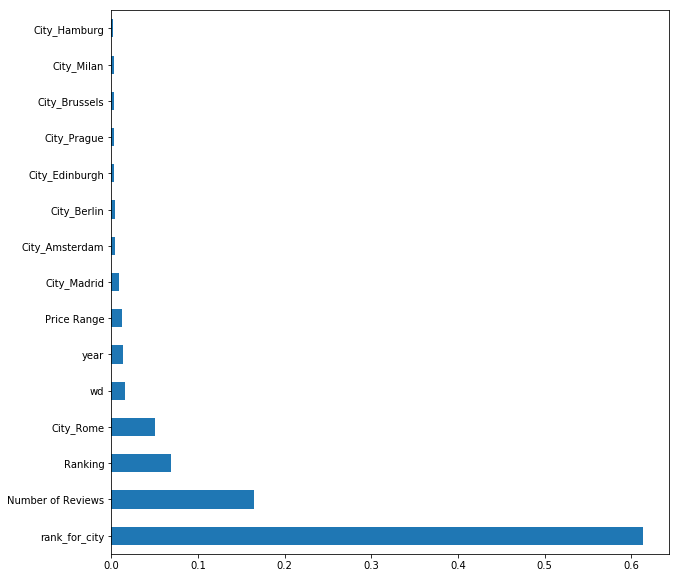

In [49]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
готовим Submission на кагл

In [50]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,rank_for_city,wd,WDNAN,year,YNAN,City_Amsterdam,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
6260,2622.0,2.000000,27.0,0.0,0.772312,4.0,0,2015.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7168,3408.0,1.815129,11.0,0.0,1.003829,6.0,1,2017.0,1,0,...,0,0,0,0,0,0,0,0,0,0
9083,3960.0,2.000000,32.0,0.0,0.550535,1.0,0,2017.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6207,5558.0,1.000000,4.0,0.0,2.054713,6.0,0,2017.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5556,1109.0,3.000000,248.0,0.0,0.326657,2.0,0,2017.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6317,1083.0,2.000000,64.0,0.0,0.657559,5.0,0,2018.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1972,6187.0,1.815129,10.0,0.0,1.622607,5.0,0,2014.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3274,946.0,1.815129,30.0,0.0,0.840142,4.0,0,2017.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,2702.0,1.000000,18.0,0.0,0.442371,2.0,0,2017.0,0,0,...,0,0,1,0,0,0,0,0,0,0
4619,5948.0,2.000000,47.0,0.0,2.297412,2.0,0,2017.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [51]:
test_data = test_data.drop(['Rating'], axis=1)

In [52]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [53]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [54]:
predict_submission

array([3.11 , 4.24 , 4.575, ..., 3.06 , 4.505, 4.36 ])

In [55]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.110
1,id_1,4.240
2,id_2,4.575
3,id_3,4.270
4,id_4,4.500
5,id_5,4.535
6,id_6,2.150
7,id_7,2.605
8,id_8,4.085
9,id_9,4.610
